In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_circles(image, dp=1.2, min_dist=80, param1=50, param2=30, min_radius=0, max_radius=0):
    
    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(image, (9, 9), 2)

    # Apply the Hough Circle Transform
    circles = cv2.HoughCircles(
        blurred_image, 
        cv2.HOUGH_GRADIENT, 
        dp=dp, 
        minDist=min_dist,
        param1=param1, 
        param2=param2, 
        minRadius=min_radius, 
        maxRadius=max_radius
    )

    # Convert the image to color to draw circles
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Draw the detected circles
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw the circle outline
            cv2.circle(color_image, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw the center of the circle
            cv2.circle(color_image, (i[0], i[1]), 2, (0, 0, 255), 3)

    # Display the original and processed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Circles')
    plt.axis('off')

    plt.tight_layout()
    plt.show()



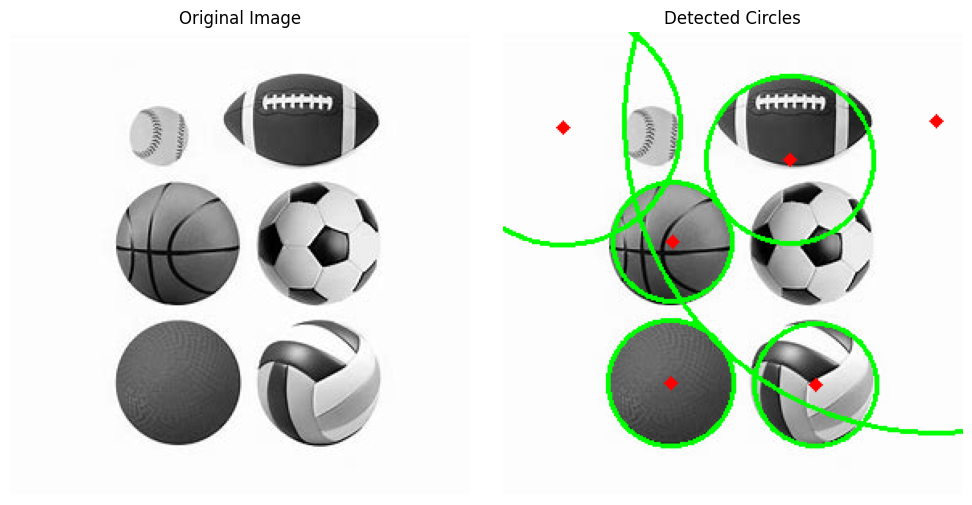

In [13]:
image = cv2.imread('data/balls.jpeg', cv2.IMREAD_GRAYSCALE)
detect_circles(image)

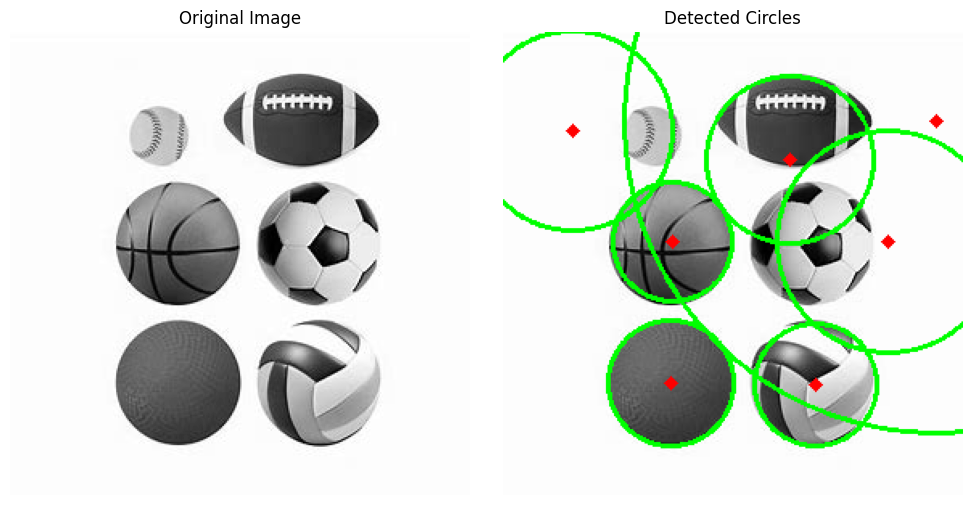

In [17]:
detect_circles(image,param1=30)

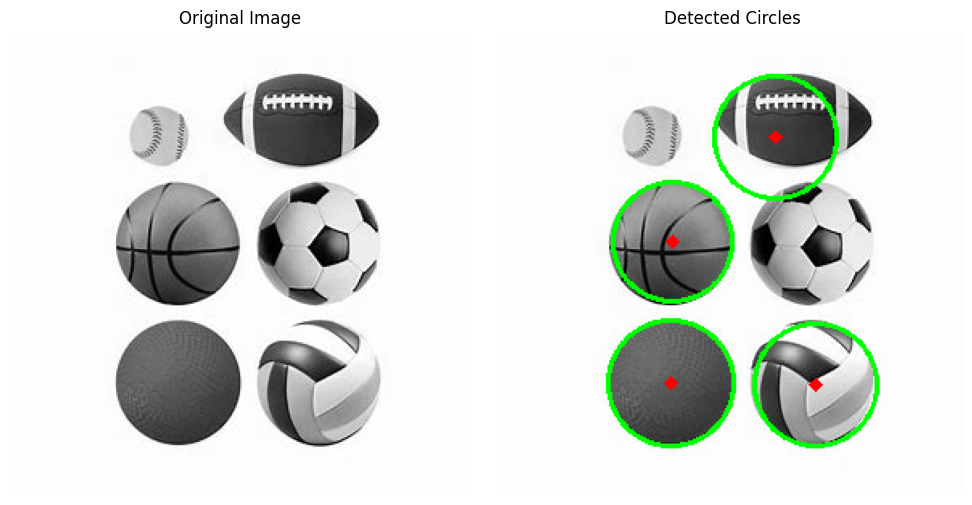

In [14]:
detect_circles(image,param2=50)

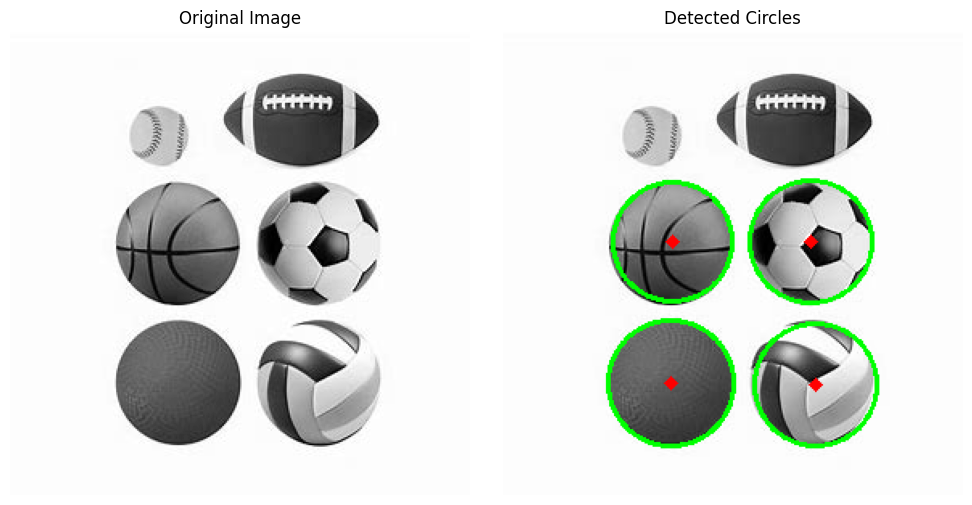

In [16]:
detect_circles(image,param2=50,min_radius=10,max_radius=50)

#### (c) Experimentation with Parameters:
1. Vary param2 (Accumulator Threshold):
- Lower value (e.g., 20): More circles detected but may include false positives.
- Higher value (e.g., 50): Fewer circles detected, focusing on prominent ones.
2. Adjust minRadius and maxRadius:
- Smaller range: Helps in focusing on specific-sized circles, avoiding noise.
- Larger range: Detects circles of varying sizes but may include unwanted results.
#### Observations:
- Lower param2: More circles are detected, which can be beneficial in images with many overlapping or faint circles, but may introduce noise.
- Higher param2: Only strong, well-defined circles are detected, which reduces noise but might miss faint circles.
- Radius Control: Tuning minRadius and maxRadius helps refine the detection to avoid small artifacts or very large, irrelevant circles.